# **Home Project**

### **Importando librerías**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from os import path
from PIL import Image   
import plotly.express as px

###**texto en negrita** **Importando y Leyendo CSV**

In [ ]:
df = pd.read_csv('articles_data_homeproject.csv',  index_col=0)
print ('File downloaded and saved!')

File downloaded and saved!


### **Creando copia del DF y mostrando los 5 primeros resultados**

In [ ]:
df = df.copy()
df.head()

,source_id,source_name,author,title,description,url,url_to_image,published_at,content,top_article,engagement_reaction_count,engagement_comment_count,engagement_share_count,engagement_comment_plugin_count
0,reuters,Reuters,Reuters Editorial,NTSB says Autopilot engaged in 2018 California...,The National Transportation Safety Board said ...,https://www.reuters.com/article/us-tesla-crash...,https://s4.reutersmedia.net/resources/r/?m=02&...,2019-09-03T16:22:20Z,WASHINGTON (Reuters) - The National Transporta...,0.0,0.0,0.0,2528.0,0.0
1,the-irish-times,The Irish Times,Eoin Burke-Kennedy,Unemployment falls to post-crash low of 5.2%,Latest monthly figures reflect continued growt...,https://www.irishtimes.com/business/economy/un...,https://www.irishtimes.com/image-creator/?id=1...,2019-09-03T10:32:28Z,The States jobless rate fell to 5.2 per cent l...,0.0,6.0,10.0,2.0,0.0
2,the-irish-times,The Irish Times,Deirdre McQuillan,"Louise Kennedy AW2019: Long coats, sparkling t...",Autumn-winter collection features designer’s g...,https://www.irishtimes.com/\t\t\t\t\t\t\t/life...,https://www.irishtimes.com/image-creator/?id=1...,2019-09-03T14:40:00Z,Louise Kennedy is showing off her autumn-winte...,1.0,NaN,NaN,NaN,NaN
3,al-jazeera-english,Al Jazeera English,Al Jazeera,North Korean footballer Han joins Italian gian...,Han is the first North Korean player in the Se...,https://www.aljazeera.com/news/2019/09/north-k...,https://www.aljazeera.com/mritems/Images/2019/...,2019-09-03T17:25:39Z,"Han Kwang Song, the first North Korean footbal...",0.0,0.0,0.0,7.0,0.0
4,bbc-news,BBC News,BBC News,UK government lawyer says proroguing parliamen...,"The UK government's lawyer, David Johnston arg...",https://www.bbc.co.uk/news/av/uk-scotland-4956...,https://ichef.bbci.co.uk/news/1024/branded_new...,2019-09-03T14:39:21Z,NaN,0.0,0.0,0.0,0.0,0.0


### **Dimensión**

In [ ]:
df.shape 

(10437, 14)

### **Valores Únicos**

In [ ]:
df.nunique() 

source_id                             13
source_name                           13
author                              2581
title                               9811
description                         9174
url                                10434
url_to_image                        8364
published_at                        9440
content                             8386
top_article                            2
engagement_reaction_count           1187
engagement_comment_count             817
engagement_share_count              1065
engagement_comment_plugin_count       10
dtype: int64

### **Resumen del DF**

In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10437 entries, 0 to 10436
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   source_id                        10437 non-null  object 
 1   source_name                      10437 non-null  object 
 2   author                           9417 non-null   object 
 3   title                            10435 non-null  object 
 4   description                      10413 non-null  object 
 5   url                              10436 non-null  object 
 6   url_to_image                     9781 non-null   object 
 7   published_at                     10436 non-null  object 
 8   content                          9145 non-null   object 
 9   top_article                      10435 non-null  float64
 10  engagement_reaction_count        10319 non-null  float64
 11  engagement_comment_count         10319 non-null  float64
 12  engagement_share_c

### **Tipo de Datos de cada Columna**

In [ ]:
df.dtypes

source_id                           object
source_name                         object
author                              object
title                               object
description                         object
url                                 object
url_to_image                        object
published_at                        object
content                             object
top_article                        float64
engagement_reaction_count          float64
engagement_comment_count           float64
engagement_share_count             float64
engagement_comment_plugin_count    float64
dtype: object

#### **Convirtiendo la columna 'published_at' en tipo de dato -datetime-**
1.- Usando pd.to_datetime para convertir la columna que se encuentra dentro del df

2.- Nuevamente se corre df.types para observar la corrección

In [ ]:
df['published_at'] = pd.to_datetime(df['published_at'])
df.dtypes

source_id                                       object
source_name                                     object
author                                          object
title                                           object
description                                     object
url                                             object
url_to_image                                    object
published_at                       datetime64[ns, UTC]
content                                         object
top_article                                    float64
engagement_reaction_count                      float64
engagement_comment_count                       float64
engagement_share_count                         float64
engagement_comment_plugin_count                float64
dtype: object

### **¿Valores Nulos?**

Se utliza la función *any* para que devuelva True si algún elemento de un iterable es verdadero, de lo contrario, devuelverá False.

In [ ]:
df.isna().any() 

source_id                          False
source_name                        False
author                              True
title                               True
description                         True
url                                 True
url_to_image                        True
published_at                        True
content                             True
top_article                         True
engagement_reaction_count           True
engagement_comment_count            True
engagement_share_count              True
engagement_comment_plugin_count     True
dtype: bool

#### **¿Cuántos valores nulos existen en cada columna?**

Con la ayuda de *.sum()* se obtiene el total de valores nulos en cada columna

In [ ]:
df.isna().sum()

source_id                            0
source_name                          0
author                             269
title                                0
description                          8
url                                  2
url_to_image                       185
published_at                         2
content                            352
top_article                          3
engagement_reaction_count           33
engagement_comment_count            33
engagement_share_count              33
engagement_comment_plugin_count     33
dtype: int64

**Reemplazando Valores Vacíos por NA**

Si existe espacios en blanco en las columnas, se reemplaza por NA para después reemplazar esos NA por un dato en específico 

1.- Utilizando *replace* para reemplazar el dato y que devuelva uno nuevo, **en este caso se utlizó np.NaN del paquete NumPy**

-- replace("subcadena a buscar", "subcadena por la cual reemplazar") - -

In [ ]:
df = df.replace(' ', np.NaN)

### **Reemplazando/Rellenando Valores Nulos**

1.- La sustitución de valores NaN por valores válidos se realiza con el uso del método fillna(), que se le pasa el valor dentro de una diccionario 

2.- Método *inplace* para sobrescribir el DF

3.- Se corre nuevamente *df.isna().sum()* para observar so hizo cambios en la columna `author` 

In [ ]:
df.fillna(value = {'author': 'Not Found'}, inplace=True)
df.isna().sum()

source_id                             0
source_name                           0
author                                0
title                                 2
description                          24
url                                   1
url_to_image                        656
published_at                          1
content                            1292
top_article                           2
engagement_reaction_count           118
engagement_comment_count            118
engagement_share_count              118
engagement_comment_plugin_count     118
dtype: int64

##### **Comprobación de Resultado**

Se comprueba que el paso anterior se haya realizado en el DF, se puede observar que la columna 'author' con el filtro 'Not Found', se realizo con éxito el cambio.

In [ ]:
df[df['author'] == 'Not Found'].head(3)

,source_id,source_name,author,title,description,url,url_to_image,published_at,content,top_article,engagement_reaction_count,engagement_comment_count,engagement_share_count,engagement_comment_plugin_count
14,bbc-news,BBC News,Not Found,Neil Lennon: Celtic manager 'very pleased' wit...,"Celtic have had a ""very good"" transfer window ...",https://www.bbc.co.uk/sport/football/49570791,https://ichef.bbci.co.uk/onesport/cps/624/cpsp...,2019-09-03 17:06:05+00:00,Media playback is not supported on this device...,0.0,0.0,0.0,0.0,0.0
29,bbc-news,BBC News,Not Found,Keith Hill: New Bolton Wanderers boss won't 'm...,New Bolton boss Keith Hill says he will protec...,https://www.bbc.co.uk/sport/football/49564550,https://ichef.bbci.co.uk/onesport/cps/624/cpsp...,2019-09-03 15:07:38+00:00,Bolton fielded the youngest side in their hist...,0.0,7.0,0.0,3.0,0.0
39,bbc-news,BBC News,Not Found,Jofra Archer slides across pitch during footba...,Ashes 2019: England's Jofra Archer celebrates ...,https://www.bbc.co.uk/sport/av/cricket/49572881,https://m.files.bbci.co.uk/modules/bbc-morph-s...,2019-09-03 17:58:22+00:00,It turns out Jofra Archer is not only good at ...,0.0,0.0,0.0,4.0,0.0


### **Rellenando Valores Nulos para la demás Columnas**

Mismo procedimiento que el anterior pero ahora para las demás columnas con valores NaN, se consideró colocarle 0 a las variables númericas 

In [ ]:
df.fillna(value={'title': 'Not Found','description': 'Not Found','url': 'Not Found','url_to_image': 'Not Found','published_at': 'Not Found', 'content': 'Not Found','top_article': 0,
                 'engagement_reaction_count': 0,'engagement_comment_count': 0,'engagement_share_count': 0,'engagement_comment_plugin_count': 0}, inplace=True)

df.isna().sum()

source_id                          0
source_name                        0
author                             0
title                              0
description                        0
url                                0
url_to_image                       0
published_at                       0
content                            0
top_article                        0
engagement_reaction_count          0
engagement_comment_count           0
engagement_share_count             0
engagement_comment_plugin_count    0
dtype: int64

### **Convirtiendo datos Float a Int**

Utilizando un diccionario y pasandole como valor int para después hacer la conversión

In [ ]:
f_a_int = {
    'top_article':int,
    'engagement_reaction_count':int,
    'engagement_comment_count':int,
    'engagement_share_count': int,
    'engagement_comment_plugin_count': int
}

### **Transformando los datos**

In [ ]:
df.astype(f_a_int).dtypes


source_id                          object
source_name                        object
author                             object
title                              object
description                        object
url                                object
url_to_image                       object
published_at                       object
content                            object
top_article                         int64
engagement_reaction_count           int64
engagement_comment_count            int64
engagement_share_count              int64
engagement_comment_plugin_count     int64
dtype: object

####  **Comporbando que los datos se tranformaron y pasando ee resultado al DF**

Se corre de nuevo *df.types* para comprobar que el df contenga los datos transformados

In [ ]:
df = df.astype(f_a_int)
df.dtypes

source_id                          object
source_name                        object
author                             object
title                              object
description                        object
url                                object
url_to_image                       object
published_at                       object
content                            object
top_article                         int64
engagement_reaction_count           int64
engagement_comment_count            int64
engagement_share_count              int64
engagement_comment_plugin_count     int64
dtype: object

### **Datos Estadísticos**

Con el método *describe()* genera un conjunto de estadísticas descriptivas

In [ ]:
df.describe().round()


,top_article,engagement_reaction_count,engagement_comment_count,engagement_share_count,engagement_comment_plugin_count
count,10437.0,10437.0,10437.0,10437.0,10437.0
mean,0.0,377.0,123.0,194.0,0.0
std,0.0,4408.0,960.0,1015.0,0.0
min,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,1.0,0.0
50%,0.0,1.0,0.0,8.0,0.0
75%,0.0,41.0,11.0,47.0,0.0
max,1.0,354132.0,48490.0,39422.0,15.0


#### **Filtrando Datos**

Obteniendo los 5 datos mayores o igual a 1500 de la columna `engagement_comment_count`

In [ ]:
x = df[df['engagement_comment_count'] >= 15000].head(5)
x

,source_id,source_name,author,title,description,url,url_to_image,published_at,content,top_article,engagement_reaction_count,engagement_comment_count,engagement_share_count,engagement_comment_plugin_count
203,bbc-news,BBC News,BBC News,MPs return ahead of key Brexit vote,Latest reaction as Prime Minister Boris Johnso...,http://www.bbc.co.uk/news/live/uk-politics-495...,//m.files.bbci.co.uk/modules/bbc-morph-news-wa...,2019-09-03 14:53:39.399687800+00:00,"The defection of Phillip Lee, MP for Bracknell...",1,34137,15261,36720,0
225,bbc-news,BBC News,https://www.facebook.com/bbcnews,Brexit: Tory MP defects ahead of crucial no de...,Phillip Lee's move leaves Boris Johnson with n...,https://www.bbc.co.uk/news/uk-politics-49570682,https://ichef.bbci.co.uk/news/1024/branded_new...,2019-09-03 14:48:14+00:00,Conservative MP Philip Lee has defected to the...,0,60117,19043,10752,0
293,business-insider,Business Insider,Hayley Peterson,Walmart will ban shoppers from openly carrying...,Walmart on Tuesday announced changes to its gu...,https://www.businessinsider.com/walmart-bans-o...,https://amp.businessinsider.com/images/5d5ce5b...,2019-09-03 17:00:00+00:00,Walmart is banning shoppers from openly carryi...,1,49024,22147,13453,15
2075,bbc-news,BBC News,BBC News,Zimbabwe ex-President Robert Mugabe dies aged 95,"Robert Mugabe, Zimbabwe's first post-independe...",http://www.bbc.co.uk/news/world-africa-49604152,https://ichef.bbci.co.uk/news/1024/branded_new...,2019-09-06 05:04:07+00:00,"Robert Mugabe, Zimbabwe's first post-independe...",1,125106,48490,32921,0
3787,cnn,CNN,"Zachary Cohen, Kaitlan Collins and Kevin Lipta...",Trump asks National Security Adviser John Bolt...,President Donald Trump said Tuesday that he ha...,https://www.cnn.com/2019/09/10/politics/trump-...,https://cdn.cnn.com/cnnnext/dam/assets/1909101...,2019-09-10 16:07:50+00:00,Washington (CNN)President Donald Trump said Tu...,1,41499,19687,12581,1


**Método Loc**

Utilizando *loc* para seleccionar todas las líneas y solo las columnas `title` y `engagement_reaction_count`

In [ ]:
df.loc[:, ['title', 'engagement_reaction_count']]

,title,engagement_reaction_count
0,NTSB says Autopilot engaged in 2018 California...,0
1,Unemployment falls to post-crash low of 5.2%,6
2,"Louise Kennedy AW2019: Long coats, sparkling t...",0
3,North Korean footballer Han joins Italian gian...,0
4,UK government lawyer says proroguing parliamen...,0
...,...,...
10432,Drop in US service sector activity raises econ...,0
10433,Banker defections pose challenge for Credit Su...,0
10434,"A 5-year-old cancer survivor donates 3,000 toy...",4072
10435,Fateful Connection,0


## **Pie Chart con Matplotlyb**

### #1 Analiza la información del archivo CSV para poder crear una gráfica de
### pastel de los artículos marcados con la cabecera `top_article`

#### **Obteniendo las frecuencias de cada variables**

Con el método *value_counts()* devuelve el agrupamiento decada variable y la frecuencia de cada una de ellas; se añadecrea una variable llamada `pie_chart`

In [ ]:
pie_chart = df['top_article'].value_counts()
pie_chart

0    9163
1    1274
Name: top_article, dtype: int64

El argumento *normalize* sirve para indicar la distribución de frecuencias en formato %

In [ ]:
pie_chart = df['top_article'].value_counts(normalize = True).round(4)
pie_chart

0    0.8779
1    0.1221
Name: top_article, dtype: float64

Mejorando el resultado: se asigna el nombre a la columna del índice con el método *rename_axis*, se convierte a DF con método *to_frame* y al mismo tiempo se añade una etiqueta para la columna de frecuencias `Percentage %` y multiplicado por 100

In [ ]:
pie_chart = df['top_article'].value_counts(normalize = True).round(4).rename_axis('Top Article').to_frame('Percentage %')*100
pie_chart

,Percentage %
Top Article,
0,87.79
1,12.21


### **Graficando**

Para obtener la gráfica se utiliza plot.pie de la paquetería matplolyb.

1.- Asignación de variables para el color y etiqueta, los cuales se colocaran dentro del código del gráfico, al igual que título

2.- Graficando, se ocupa `autopct` para mostrar los valores porcentuales, `'%.2f%%'` donde % informa que se trata de un carácter string y .2f que indica el tipo de dato y cómo será representado, donde f significa que es tipo float y el .2 índica que se representará con dos pocisiones decimales. Los %% indican que el carácter % debe ser impreso al final de la string

3.- figsize para indicar el tamaño

4.- Shadow para colocarle una sombra

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f28475af5f8>],
      dtype=object)

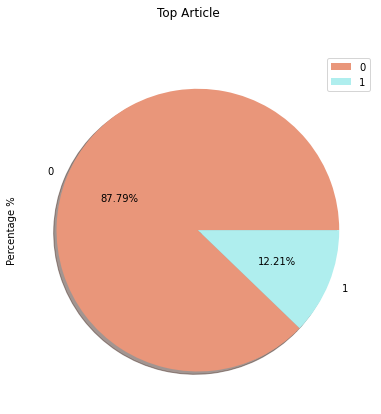

In [ ]:
colors = ['DarkSalmon', 'PaleTurquoise']
labels=['0','1']

pie_chart.plot.pie( subplots=True, autopct='%.2f%%', labels=labels, figsize= (10,6.5), colors=colors, label = 'Percentage %', shadow=True, title='El top con ')


### **Pie Chart con Plotly**

#### **Frecuencias**

In [ ]:
pie_chart1 = df['top_article'].value_counts(normalize = True).round(3)
pie_chart1

0    0.878
1    0.122
Name: top_article, dtype: float64

**Graficando**

Se utlizan los valores de  `pie_chart1 `, pull funciona para separar una parte del gráfico

In [ ]:




pie = go.Figure(data=[go.Pie(labels=None,values=pie_chart1,title='Proportion of articles marked as TOP ARTICLE',pull=[0.20, 0, 0.8, 0])])
pie.show()

## **Distribución por fuente de información**

## **Bar Chart**

## #2 Analiza la información dentro de tu dataframe. Y extrae el total de artículos publicados por cada fuente de información `source_name`

Se obtuvo la frecuencia de la cada funte de inf. y se devolvió en un DF, asignado a una variable `bar_chart` para después graficarla

In [ ]:
bar_chart =df['source_name'].value_counts().rename_axis('Source_Name').to_frame('Total')
bar_chart

,Total
Source_Name,
Reuters,1252
BBC News,1242
The Irish Times,1232
ABC News,1139
CNN,1132
Business Insider,1048
The New York Times,986
CBS News,952
Newsweek,539


#### **Graficando**

1.- Se asginaron dos variables para colores, la primera aplica para los 5 pero después se asigna la segunda que solo aplica al primer color que será el que mayor frecuencia represente

2.- La grafica representa los primero 5 elementos del la columna `source_name`

In [ ]:
colors = ['CornflowerBlue'] *5
colors[0] =  'Crimson'

fig = go.Figure(data=[go.Bar(
    x=['Reuters', 'BBC News', 'The Irish Times','ABC News','CNN'],
    y=[1252, 1242, 1232, 1139, 1132],
    marker_color=colors)])

fig.update_layout(title_text='TOP 5')

## #2 Analiza la información dentro de tu dataframe. Y extrae el top 10 de autores dentro de tu dataframe `author`

Frecuencias

In [ ]:

top_10 = df['author'].value_counts().sort_values(ascending=False)
top_10

Not Found                                              1020
The Associated Press                                    975
Reuters Editorial                                       685
CBS News                                                637
https://www.facebook.com/bbcnews                        533
                                                       ... 
Thaier  Al-Sudani                                         1
Ramona ShelburneESPN Senior Writer                        1
Laura He, Jack Guy and Serenitie Wang, CNN Business       1
Idrees Ali                                                1
Bhadra Sharma                                             1
Name: author, Length: 2581, dtype: int64

**Top 10 de`author`**

DF del top 10 de`author` 

In [ ]:
top_10.head(10).rename_axis('Author').to_frame('Total')


,Total
Author,
Not Found,1020
The Associated Press,975
Reuters Editorial,685
CBS News,637
https://www.facebook.com/bbcnews,533
Al Jazeera,312
The Irish Times,255
BBC News,201
CBS/AP,69


## **BAR CHART H**

**Graficando**

Se realizó el mismo procedimiento que la anterior, solo cambió la orientzación a horizontal

In [ ]:
colors = ['DarkOrange'] *10
colors[9] =  'Tomato'

fig = go.Figure(data=[go.Bar(
    x=[35,45,69,201,255,312,533,637,685,975],
    y=['AP','Dan Cancian','CBS/AP','BBC News','The Irish Times','Al Jazeera','https://www.facebook.com/bbcnews','CBS News','Reuters Editorial','The Associated Press'],
    marker_color=colors,
    orientation='h')])

fig.update_layout(title_text='TOP 10')

## **Nube de palabras**

## #3 Analiza la información de tu dataframe y genera una nube de palabras más comunes por título de los artículos



#### Para obtener este resultado se utlizó la paquetería wordcloud 

1.- Se asigno una variable la columna que se presenta en la nube 

2.- Para el gráfico, se ocuparon 5000 como máximo de palabras, el fondo color negro, en generate se coloca la variable asignada y convertida en tipo str

3.- Se imprime el gráfico, ocultado los ejes 

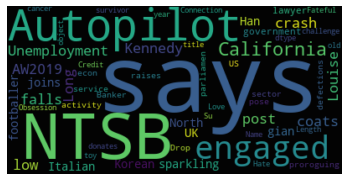

In [ ]:
text = df['title']

wordcloud = WordCloud(max_words=5000,background_color='Black').generate(str(text)) 


plt.imshow(wordcloud, interpolation='bilinear',alpha = 5)
plt.axis("off") 
plt.show()

En este gráfico se realizó algo similar, solo con menos palabras, otro color de fondo, máx tamaño de fuente y otro tamaño

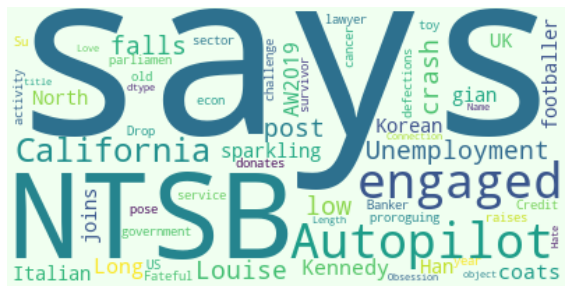

In [ ]:

wordcloud = WordCloud(max_font_size=500, max_words=150, background_color="Honeydew").generate(str(text))


image = plt.figure()
image.set_figwidth(10)
image.set_figheight(20)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### **Importación de Imagen para generar un Gráfico**

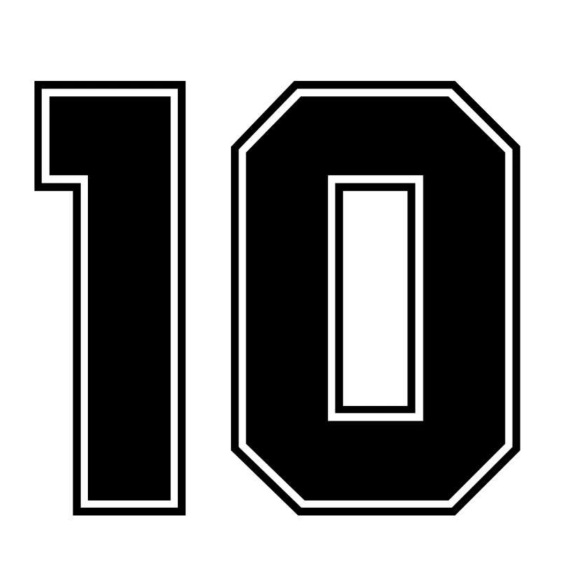

In [ ]:
diez = np.array(Image.open('10.png'))


image = plt.figure()
image.set_figwidth(10)
image.set_figheight(20)


plt.imshow(diez, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()  

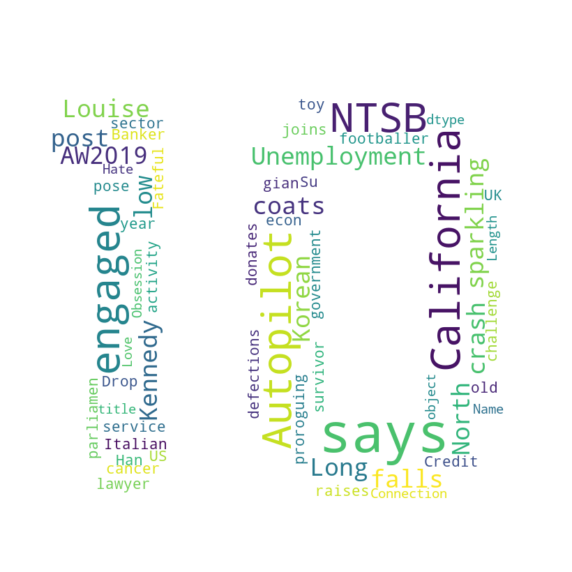

In [ ]:
m_wc = WordCloud(background_color='white', max_words=20000, mask=diez)

# generate the word cloud
m_wc.generate(str(text))

# display the word cloud
image = plt.figure()
image.set_figwidth(10)
image.set_figheight(20)

plt.imshow(m_wc, interpolation='bilinear')
plt.axis('off')
plt.show()